In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('cities_r2.csv')
df.head()

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031


In [3]:
df.shape

(493, 22)

In [5]:
df.isna().sum().sum()

0

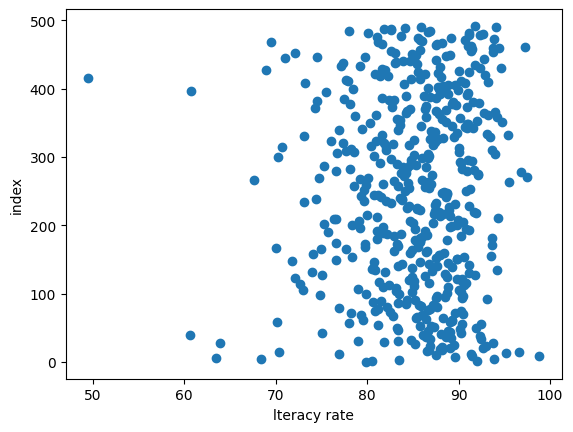

In [10]:
plt.scatter(df['effective_literacy_rate_total'],df.index)
plt.xlabel('lteracy rate')
plt.ylabel('index')
plt.show()

In [12]:
column_to_cluster = ['effective_literacy_rate_total']
selected_data = df[column_to_cluster]
sc = StandardScaler()
scaled_data =  sc.fit_transform(selected_data)

In [14]:
krng = range(1,25)

sse=[]

for k in krng:
    km = KMeans(n_clusters=k)
    km.fit(scaled_data)
    sse.append(km.inertia_)

sse

c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  s

[492.9999999999998,
 194.0978564624931,
 106.13437469098342,
 67.26695490379964,
 45.97912420777481,
 32.5532938623539,
 24.018843325357185,
 18.386521140624698,
 15.197776877217002,
 11.884263867182355,
 9.447945309387084,
 7.7761614628484494,
 6.330446738227531,
 5.33726604767338,
 4.5286195562139175,
 3.9144868557238484,
 3.4170040159430575,
 3.0703150577452436,
 2.7782382780426373,
 2.4120130887001934,
 2.0895021520908865,
 1.8851465037618582,
 1.6372008928355393,
 1.5004551526744025]

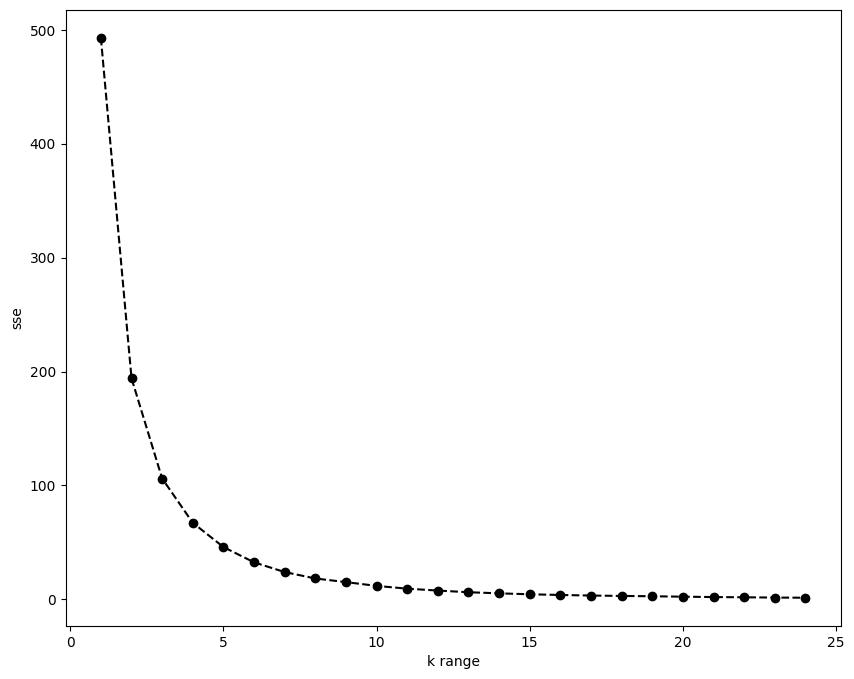

In [25]:
plt.figure(figsize=(10,8))
plt.plot(krng,sse,color='black',linestyle="dashed",marker='o')
plt.xlabel('k range')
plt.ylabel('sse')
plt.show()

In [27]:
km=KMeans(n_clusters=3,random_state=42)
km.fit(scaled_data)
pred = km.predict(scaled_data)

c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [29]:
df['Cluster'] = pd.DataFrame(pred,columns=['Cluster'])
df['Cluster'].value_counts()

Cluster
0    218
2    207
1     68
Name: count, dtype: int64

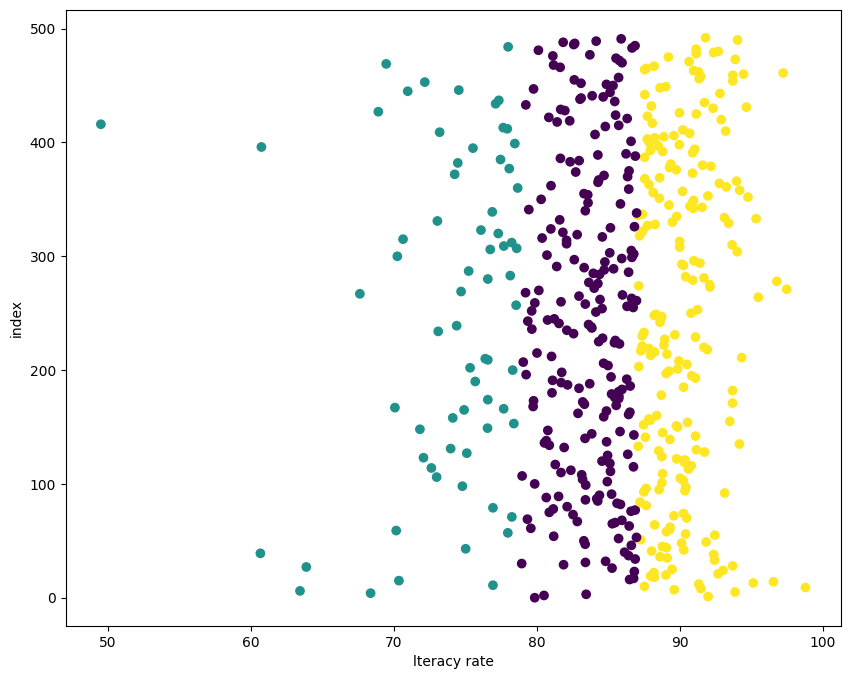

In [31]:
plt.figure(figsize=(10,8))
plt.scatter(df['effective_literacy_rate_total'],df.index,c=df['Cluster'])
plt.xlabel('lteracy rate')
plt.ylabel('index')
plt.show()